## 목표
- 유방암 데이터셋을 활용한 모델링(이진분류)

In [ ]:
# 구글 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 작업하고 있는 위치 변경
%cd /content/drive/MyDrive/Colab Notebooks/deeplearning_2025

/content/drive/MyDrive/Colab Notebooks/deeplearning_2025


In [ ]:
# 데이터 분석에 필요한 라이브러리 3대장
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# sklearn에서 제공하는 유방암 데이터셋 불러오기
from sklearn.datasets import load_breast_cancer

In [ ]:
# 데이터 로드
breast_cancer = load_breast_cancer()
breast_cancer
# 딕셔너리 형태 --> sklearn에서 제공하는 머신러닝 전용 데이터셋은 이름이 Bunch 객체
# “딕셔너리처럼 생겼지만 점(.)으로도 접근할 수 있는” 객체
# 딕셔너리 형태의 번치객체

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
X = breast_cancer.data
y = breast_cancer.target

# 크기 확인
print(X.shape, y.shape)

(569, 30) (569,)


In [ ]:
pd.Series(y).value_counts()
# 1: 양성
# 2: 악성(음성)

,count
1,357
0,212


In [ ]:
# train, test 분리(test 사이즈는 0.3, random_state = 5)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5, stratify = y)

# stratify = y --> 클래스의 비율을 동등하게 유지하면서 분할(클래스의 불균형을 해결)

# 크기 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(398, 30) (398,)
(171, 30) (171,)


In [ ]:
# 답데이터가 균등하게 분할되어있는지 확인
display(pd.Series(y_train).value_counts())
display(pd.Series(y_test).value_counts())

,count
1,250
0,148


,count
1,107
0,64


## 딥러닝 모델링 - 이진분류

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

### MLP (Multi Layer Perceptron, 다층 퍼셉트론)
- 단층 퍼셉트론(입력과 출력만으로 이루어진 신경망)에서
차원의 수를 확장하여(은닉층을 추가) 비선형적이게 만든 여러개의 층으로 구성된 신경망

In [ ]:
# 1. 신경망 구조 설계
model = Sequential()

# 2. 입력층 설계
model.add(InputLayer(shape=(30,)))

# 3. 은닉층 설계
model.add(Dense(units = 32, activation = 'sigmoid'))
model.add(Dense(units = 64, activation = 'sigmoid'))
model.add(Dense(units = 128, activation = 'sigmoid'))
model.add(Dense(units = 256, activation = 'sigmoid'))
model.add(Dense(units = 128, activation = 'sigmoid'))
model.add(Dense(units = 64, activation = 'sigmoid'))
model.add(Dense(units = 32, activation = 'sigmoid'))

# 4. 출력층
model.add(Dense(units = 1, activation = 'sigmoid'))

In [1]:
# 5. 학습 방법 설정 --> 출력 형태에 따라 다르게 설정
model.compile(
  loss = 'binary_crossentropy', # 이진분류 -> 오차를 구해주는 도구
  metrics = ['accuracy'],       # 평가지표를 정확도로 삼겠다
  optimizer = 'adam'            # 최적화 함수 (SGD는 local minima에 빠질 확률이 높다)
)

# loss값 설정
# 회귀 : MSE(평균 제곱 오차), y값이 실수값인 경우 사용되는 솔실함수(도구)
# 이진분류 : binary_crossentorpy(이항 교차 엔트로피), y값이 이진인 경우 사용되는 손실함수(도구)
# 다중분류 : categorical_crossentropy(범주형 교차 엔트로피), y값이 다중이고 y가 2D인 경우 사용되는 손실함수(도구)
# 다중분류 : sparse_categorical_crossentropy, y값이 다중이고 y가 1D인 경우 사용되는 손실함수(도구)

NameError: name 'model' is not defined

### Loss Function(손실함수) 설정 방법
1.  binary crossentropy(이항 교차 엔트로피)
 - y값이 이진분류인 경우 사용되는 손실함수
 - 활성화함수로는 sigmoid를 사용
2. categorical crossentropy(범주형 교차 엔트로피)
 - y값이 다중분류인 경우 사용되는 손실함수
 - 활성화함수로는 softmax를 사용
 - 라벨이 (0,1,0,0), (0,0,1,0)과 같이 원핫인코딩 된 형태로 제공된 경우 사용
3. sparse_categorical_crossentropy
 - y값이 다중분류인 경우 사용되는 손실함수
 - 활성화함수로 softmax를 사용
 - 라벨이 (1,2,3,4)와 같이 정수형인 경우 사용
4. MSE(평균제곱오차)
 - y값이 연속형인 경우 사용되는 손실함수
 - 가장 흔하게 사용(오차가 크면 클수록 더 큰 패널티를 부여하기 때문)
 - 대체 함수로는 MAE(평균절대오차, 오차값이 0부터 1 사이의 값을 다루는 경우), RMSE(MSE의 왜곡된 값을 제한하고 보고자 하는 경우) 등이 있다.

In [ ]:
# 학습
h = model.fit(X_train, y_train, validation_split=0.3, epochs = 100)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.3605 - loss: 0.8201 - val_accuracy: 0.6000 - val_loss: 0.6744
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6180 - loss: 0.6628 - val_accuracy: 0.6000 - val_loss: 0.6918
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6615 - loss: 0.6446 - val_accuracy: 0.6000 - val_loss: 0.6969
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6280 - loss: 0.6703 - val_accuracy: 0.6000 - val_loss: 0.6785
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6407 - loss: 0.6530 - val_accuracy: 0.6000 - val_loss: 0.6741
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6241 - loss: 0.6624 - val_accuracy: 0.6000 - val_loss: 0.6741
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6089 - loss: 0.6706 - val_accuracy: 0.6000 - val_loss: 0.6750
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6392 - loss: 0.6538 - val_accuracy: 0.6000 - val_loss:

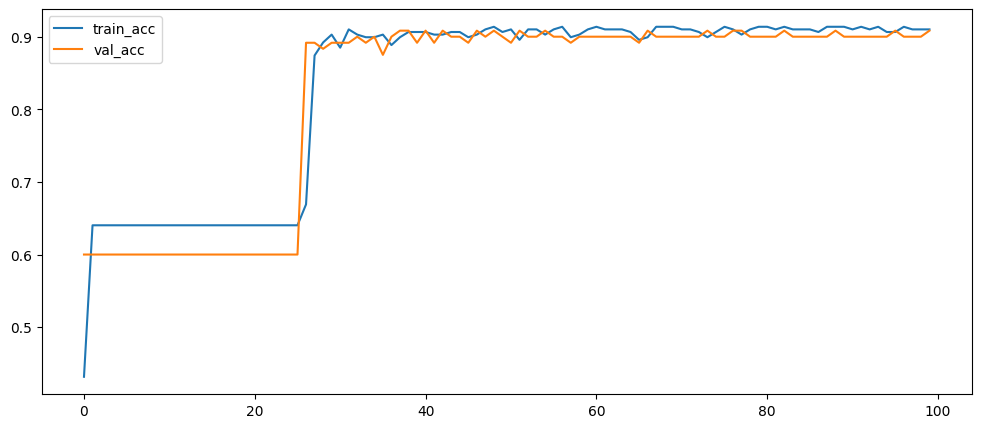

In [ ]:
# 평가
plt.figure(figsize=(12,5))
plt.plot(h.history['accuracy'], label = 'train_acc')
plt.plot(h.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

# 초기 epoch에서는 local minima에 빠져있는 모습이 관찰됨
# 그러나 adam으로 인해서 빠져나와 전역최소점을 찾아가는 모습이 관찰되었다.